# **SVM & Naive Bayes**

# **Theoretical Questions**

1. **What is a Support Vector Machine (SVM)?**

Ans. A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the training data. The hyperplane is chosen to maximize the margin between the classes, which are the closest data points to the hyperplane. These closest points are called support vectors, and they play a crucial role in defining the hyperplane. SVMs are particularly effective in high-dimensional spaces and can use different kernel functions to handle non-linearly separable data by mapping it to a higher-dimensional feature space.

---

2. **What is the difference between Hard Margin and Soft Margin SVM?**

Ans. The main difference between Hard Margin and Soft Margin SVM lies in how they handle misclassified data points.

*   **Hard Margin SVM:** This approach aims to find a hyperplane that perfectly separates the data points into their respective classes, allowing no misclassifications. It works well when the data is linearly separable. However, if there are any outliers or the data is not perfectly separable, a hard margin SVM might not find a solution or could be overly sensitive to noise.

*   **Soft Margin SVM:** This approach allows for some misclassifications to occur. It introduces a slack variable that permits data points to be on the wrong side of the hyperplane or even within the margin. The goal is to find a balance between maximizing the margin and minimizing the misclassification errors. Soft margin SVM is more robust to noise and outliers and is suitable for data that is not perfectly linearly separable.

In essence, Hard Margin SVM is stricter and assumes perfect separability, while Soft Margin SVM is more flexible and allows for some errors to achieve a better generalization on real-world, noisy data.

* * *

3. **What is the mathematical intuition behind SVM?**

Ans. The mathematical intuition behind SVM revolves around finding a hyperplane that maximizes the margin between the different classes. For a linearly separable dataset, a hyperplane can be represented by the equation $w \cdot x - b = 0$, where $w$ is the normal vector to the hyperplane and $b$ is the bias term.

The distance between a data point $x_i$ and the hyperplane is given by $\frac{|w \cdot x_i - b|}{||w||}$. SVM aims to find $w$ and $b$ such that this distance is maximized for the data points closest to the hyperplane (the support vectors).

For the support vectors, the functional margin is defined as $y_i(w \cdot x_i - b) = 1$, where $y_i$ is the class label (+1 or -1). The geometric margin is then $\frac{1}{||w||}$. Maximizing the geometric margin is equivalent to minimizing $||w||^2$, subject to the constraint that all data points are correctly classified with a functional margin of at least 1: $y_i(w \cdot x_i - b) \ge 1$ for all $i$.

In the case of Soft Margin SVM, a slack variable $\xi_i$ is introduced to allow for misclassifications. The objective then becomes minimizing $\frac{1}{2}||w||^2 + C \sum_{i} \xi_i$, subject to $y_i(w \cdot x_i - b) \ge 1 - \xi_i$ and $\xi_i \ge 0$. The parameter $C$ controls the trade-off between maximizing the margin and minimizing the training errors. A smaller $C$ allows for more misclassifications, while a larger $C$ penalizes misclassifications more heavily.

This optimization problem is typically solved using quadratic programming techniques. The resulting $w$ and $b$ define the optimal hyperplane, and the support vectors are the data points for which the constraint is active (i.e., $y_i(w \cdot x_i - b) = 1$ for Hard Margin, or $y_i(w \cdot x_i - b) = 1 - \xi_i$ with $\xi_i > 0$ for Soft Margin).

* * *

4. **What is the role of Lagrange Multipliers in SVM?**

Ans. Lagrange multipliers play a crucial role in solving the constrained optimization problem in SVM. The problem of finding the optimal hyperplane is to minimize $\frac{1}{2}||w||^2$ subject to the constraints $y_i(w \cdot x_i - b) \ge 1$ for all data points (in the case of Hard Margin SVM).

This is a convex optimization problem with inequality constraints. Lagrange multipliers are used to convert this constrained problem into an unconstrained one by forming the Lagrangian function. The Lagrangian for Hard Margin SVM is:

$L(w, b, \alpha) = \frac{1}{2}||w||^2 - \sum_{i} \alpha_i [y_i(w \cdot x_i - b) - 1]$

where $\alpha_i \ge 0$ are the Lagrange multipliers.

By taking partial derivatives of the Lagrangian with respect to $w$ and $b$ and setting them to zero, we can find the optimal values. This process leads to the dual form of the optimization problem, which is often easier to solve. The dual problem involves maximizing a function of the Lagrange multipliers $\alpha_i$, subject to certain constraints.

The key insight is that the optimal $w$ can be expressed as a linear combination of the training data points, where the coefficients are the Lagrange multipliers:

$w = \sum_{i} \alpha_i y_i x_i$

The non-zero $\alpha_i$ correspond to the support vectors. Data points that are not support vectors have $\alpha_i = 0$. This means that the optimal hyperplane is determined only by the support vectors, making SVM computationally efficient and robust to non-support vector data points.

In Soft Margin SVM, additional slack variables are introduced, and the Lagrangian formulation is extended to include these variables and their corresponding constraints. The principle remains the same: transforming the constrained problem into a dual problem involving Lagrange multipliers, where the non-zero multipliers identify the support vectors (which can now include misclassified points within the margin).

In essence, Lagrange multipliers allow us to solve the SVM optimization problem efficiently by transforming it into a dual problem, and they reveal the critical role of the support vectors in defining the decision boundary.

* * *

5. **What are Support Vectors in SVM?**

Ans. In Support Vector Machines (SVMs), **Support Vectors** are the data points that lie closest to the decision boundary (hyperplane). These are the points that, if removed, would alter the position of the hyperplane.

More formally, support vectors are the training data points for which the Lagrange multipliers ($\alpha_i$) in the dual optimization problem are non-zero.

In a **Hard Margin SVM**, the support vectors are the points that lie exactly on the margin boundaries. Their functional margin is equal to 1.

In a **Soft Margin SVM**, the support vectors can be:
*   Points that lie exactly on the margin boundaries (functional margin = 1).
*   Points that lie within the margin but are correctly classified (functional margin < 1).
*   Points that are misclassified (functional margin < 0).

The support vectors are critical because they are the only data points that influence the definition of the optimal hyperplane. All other data points that are not support vectors do not affect the decision boundary. This property makes SVMs memory efficient and robust to outliers that are far away from the decision boundary.

* * *

6. **What is a Support Vector Classifier (SVC)?**

Ans. A Support Vector Classifier (SVC) is a specific implementation of the Support Vector Machine (SVM) algorithm used for **classification** tasks. While SVM is a broader term that can encompass both classification and regression (Support Vector Regression or SVR), SVC specifically refers to the application of SVM for separating data points into distinct classes.

SVC works by finding the optimal hyperplane that maximizes the margin between the different classes in the feature space. It can handle both linearly separable and non-linearly separable data through the use of various kernel functions (like linear, polynomial, radial basis function (RBF), etc.) that map the data into a higher-dimensional space where it might become linearly separable.

Key characteristics of SVC:

*   **Supervised Learning:** It requires labeled training data.
*   **Classification:** Its primary goal is to assign data points to one of several predefined classes.
*   **Margin Maximization:** It aims to find the hyperplane with the largest margin between the classes, which generally leads to better generalization performance.
*   **Kernel Trick:** It can use kernel functions to handle non-linear decision boundaries.
*   **Support Vectors:** The decision boundary is determined by a subset of the training data points called support vectors.

In essence, when we use SVM for classification, we are typically using a Support Vector Classifier (SVC). It's a powerful and versatile algorithm widely used in various classification problems.

* * *

7. **What is a Support Vector Regressor (SVR)?**

Ans. A Support Vector Regressor (SVR) is a specific implementation of the Support Vector Machine (SVM) algorithm used for **regression** tasks. While Support Vector Classifiers (SVC) are used for classification, SVR is used to predict a continuous output value.

Similar to SVC, SVR works by finding a hyperplane, but instead of separating data points into distinct classes, it aims to find a hyperplane that best fits the data points while minimizing the error between the predicted values and the actual values. The key idea in SVR is to find a function that deviates from the target values by no more than a certain threshold (epsilon, $\epsilon$).

Key characteristics of SVR:

*   **Supervised Learning:** It requires labeled training data with continuous target values.
*   **Regression:** Its primary goal is to predict a continuous output.
*   **Epsilon-Insensitive Loss Function:** SVR uses an epsilon-insensitive loss function, which means that errors within a certain margin ($\epsilon$) of the predicted value are not penalized. This creates a "tube" around the predicted line, and the goal is to find the hyperplane that minimizes the number of data points outside this tube and the magnitude of the errors for those points.
*   **Kernel Trick:** Like SVC, SVR can use kernel functions to handle non-linear relationships between the input features and the target variable by mapping the data into a higher-dimensional space.
*   **Support Vectors:** The regression function is determined by a subset of the training data points, which are the support vectors. These are the points that lie outside or on the boundary of the epsilon-tube.

In essence, SVR applies the principles of SVM to regression problems, aiming to find a function that provides a good fit to the data while being robust to outliers by using an epsilon-insensitive loss function.

* * *

8. **What is the Kernel Trick in SVM?**

Ans. The **Kernel Trick** is a powerful technique used in Support Vector Machines (SVMs) that allows them to handle non-linearly separable data. It avoids the explicit mapping of data into a higher-dimensional feature space, which can be computationally expensive or even infinite-dimensional.

Instead of explicitly transforming the data, the kernel trick uses a **kernel function**, denoted by $K(x_i, x_j)$, which calculates the dot product between the images of two data points ($x_i$ and $x_j$) in the higher-dimensional space, without actually computing the transformation itself. Mathematically, this is expressed as:

$K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$

where $\phi$ is the mapping function that transforms the data from the original feature space to the higher-dimensional space.

By replacing the dot product $\phi(x_i) \cdot \phi(x_j)$ with the kernel function $K(x_i, x_j)$ in the SVM optimization problem (specifically, in the dual form), SVM can effectively find a linear decision boundary in the higher-dimensional space, which corresponds to a non-linear decision boundary in the original feature space.

Common kernel functions include:

*   **Linear Kernel:** $K(x_i, x_j) = x_i \cdot x_j$ (equivalent to no mapping, for linearly separable data)
*   **Polynomial Kernel:** $K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d$
*   **Radial Basis Function (RBF) or Gaussian Kernel:** $K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$
*   **Sigmoid Kernel:** $K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + r)$

The choice of the kernel function depends on the nature of the data and the desired decision boundary. The kernel trick makes SVM a flexible and powerful algorithm for handling complex, non-linear relationships in the data without incurring the computational cost of explicit feature space transformation.

* * *

9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**

Ans. Here's a comparison of three common kernel functions used in Support Vector Machines (SVMs): Linear, Polynomial, and Radial Basis Function (RBF) kernels, presented as key points:

**Linear Kernel** ($K(x_i, x_j) = x_i \cdot x_j$)
*   **Decision Boundary:** Linear.
*   **Complexity:** Low.
*   **Parameters:** None.
*   **Suitability:** Linearly separable data, high-dimensional data where linear separation is still effective.
*   **Pros:** Simple, fast, good for high-dimensional sparse data.
*   **Cons:** Cannot handle non-linearly separable data well.

**Polynomial Kernel** ($K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d$)
*   **Decision Boundary:** Non-linear (polynomial).
*   **Complexity:** Moderate (depends on degree $d$).
*   **Parameters:** Degree ($d$), coefficient ($\gamma$), independent term ($r$).
*   **Suitability:** Data with polynomial relationships between features and target.
*   **Pros:** Can model complex non-linear relationships.
*   **Cons:** Can be prone to overfitting with high degrees, sensitive to parameter choice.

**RBF (Gaussian) Kernel** ($K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$)
*   **Decision Boundary:** Non-linear (can be very complex).
*   **Complexity:** High (can easily overfit).
*   **Parameters:** Gamma ($\gamma$).
*   **Suitability:** Non-linearly separable data, often a good default choice.
*   **Pros:** Highly flexible, can handle complex decision boundaries.
*   **Cons:** Prone to overfitting, sensitive to $\gamma$ parameter, computationally more expensive than linear for large datasets.

**Key Considerations:**

*   **Linear Kernel:** Best for linearly separable data or when we have a very large number of features (high-dimensional data) where a linear model is likely to perform well and is computationally efficient.
*   **Polynomial Kernel:** Useful when there's a belief that the decision boundary has a polynomial form. The degree of the polynomial ($d$) is a crucial parameter to tune. Higher degrees can model more complex boundaries but increase the risk of overfitting.
*   **RBF Kernel:** This is often the default choice and works well for many problems. It can model highly complex, non-linear decision boundaries. The $\gamma$ parameter controls the influence of a single training example. A small $\gamma$ means a large influence, leading to smoother boundaries, while a large $\gamma$ means a small influence, leading to more complex and potentially overfitted boundaries.

In practice, the choice of kernel often involves experimentation and cross-validation to find the one that performs best on our specific dataset. The RBF kernel is a good starting point due to its flexibility, but the Linear kernel can be surprisingly effective and computationally efficient, especially for high-dimensional data.

* * *

10. **What is the effect of the C parameter in SVM?**

Ans. The **C parameter** in Support Vector Machines (SVM) is a regularization parameter that controls the trade-off between achieving a low training error and a large margin. It is primarily used in **Soft Margin SVM**.

*   **Small C:** A small value of C creates a larger margin, allowing for more misclassifications in the training data. The model prioritizes finding a wider separation even if it means some training points are on the wrong side of the hyperplane or within the margin. This can lead to a simpler model and potentially better generalization on unseen data if the training data is noisy or has outliers. A smaller C promotes smoothness in the decision boundary.

*   **Large C:** A large value of C creates a smaller margin, penalizing misclassifications more heavily. The model tries to classify all or almost all training data points correctly, even if it means a narrower margin. This can lead to a more complex model that fits the training data very closely but might overfit to noisy data or outliers, resulting in poor generalization on unseen data. A larger C promotes fitting the training data more strictly.

In essence, the C parameter balances the desire to have a wide margin (which promotes good generalization) with the need to correctly classify the training data.

*   **High C:** Low bias, high variance (potential overfitting).
*   **Low C:** High bias, low variance (potential underfitting).

Tuning the C parameter is crucial for optimizing the performance of a Soft Margin SVM model. It is typically done using techniques like cross-validation. The optimal C value depends on the specific dataset and the problem being solved.

* * *

11. **What is the role of the Gamma parameter in RBF Kernel SVM?**

Ans. The **Gamma ($\gamma$) parameter** in the Radial Basis Function (RBF) kernel of SVM defines how far the influence of a single training example reaches. It can be thought of as the inverse of the radius of influence for samples selected by the model as support vectors.

*   **Small Gamma:** A small value of gamma indicates a larger radius of influence, meaning that the decision boundary is smoother and considers points further away. This can lead to a simpler model that might underfit the training data if the relationship is complex.

*   **Large Gamma:** A large value of gamma indicates a smaller radius of influence, meaning that the decision boundary is more complex and is heavily influenced by points that are very close. This can lead to a more complex model that fits the training data very closely but might overfit to noisy data or outliers, resulting in poor generalization on unseen data.

In essence, the gamma parameter controls the flexibility of the decision boundary when using the RBF kernel.

*   **High Gamma:** Low bias, high variance (potential overfitting). The model becomes highly sensitive to the training data points.
*   **Low Gamma:** High bias, low variance (potential underfitting). The model is less sensitive to individual training data points.

Tuning the gamma parameter is crucial for optimizing the performance of an RBF Kernel SVM model. It is typically done in conjunction with the C parameter using techniques like cross-validation. The optimal gamma value depends on the specific dataset and the problem being solved.

* * *

12. **What is the Naïve Bayes classifier, and why is it called "Naïve"?**

Ans. The **Naïve Bayes classifier** is a probabilistic machine learning algorithm based on **Bayes' Theorem**. It is primarily used for **classification** tasks. Despite its simplicity, it often performs surprisingly well, especially in text classification problems.

The core idea behind Naïve Bayes is to calculate the probability of a given data point belonging to a particular class, given its features. It does this by using Bayes' Theorem, which states:

$P(Class|Features) = \frac{P(Features|Class) \cdot P(Class)}{P(Features)}$

Where:
*   $P(Class|Features)$ is the posterior probability of the class given the features (what we want to predict).
*   $P(Features|Class)$ is the likelihood of the features given the class.
*   $P(Class)$ is the prior probability of the class.
*   $P(Features)$ is the prior probability of the features.

The classifier predicts the class with the highest posterior probability.

It is called **"Naïve"** because of the **"Naïve independence assumption"** it makes. This assumption is that all features are **independent** of each other, given the class. Mathematically, this means:

$P(Features|Class) = P(Feature_1|Class) \cdot P(Feature_2|Class) \cdot \dots \cdot P(Feature_n|Class)$

In real-world datasets, features are rarely truly independent. However, this simplifying assumption makes the calculation of $P(Features|Class)$ much more computationally tractable, especially for high-dimensional data.

Despite this unrealistic assumption, Naïve Bayes can still perform well because the goal is often not to get the exact probability values, but rather to determine which class has the highest probability. Even if the individual probabilities are not perfectly accurate due to the independence assumption, the relative probabilities between classes can still lead to the correct classification.

In summary, the Naïve Bayes classifier is a simple yet effective probabilistic classifier based on Bayes' Theorem, and its "Naïve" name comes from its strong assumption of feature independence.

* * *

13. **What is Bayes’ Theorem?**

Ans. **Bayes' Theorem** is a fundamental theorem in probability theory that describes how to update the probability of a hypothesis based on new evidence. It's a way to revise existing predictions or theories (update prior probabilities) in light of new, relevant data.

Mathematically, Bayes' Theorem is stated as:

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

Where:

*   $P(A|B)$ is the **posterior probability**: the probability of hypothesis A being true given the evidence B. This is what we want to find.
*   $P(B|A)$ is the **likelihood**: the probability of observing the evidence B given that the hypothesis A is true.
*   $P(A)$ is the **prior probability**: the initial probability of hypothesis A being true before observing any evidence.
*   $P(B)$ is the **evidence (or marginal likelihood)**: the probability of observing the evidence B under all possible hypotheses. It acts as a normalizing constant.

In simpler terms, Bayes' Theorem tells us how to calculate the probability of something (hypothesis A) being true, given that we have observed some data (evidence B). It combines our initial belief about the hypothesis ($P(A)$) with the likelihood of observing the data if the hypothesis were true ($P(B|A)$), normalized by the overall probability of the data ($P(B)$).

Bayes' Theorem is widely used in various fields, including statistics, machine learning (as seen in Naïve Bayes), medical diagnosis, and finance, for tasks such as:

*   **Updating beliefs:** Incorporating new information to refine probability estimates.
*   **Classification:** Determining the probability of a data point belonging to a certain class given its features.
*   **Inference:** Making conclusions about unknown parameters or events based on observed data.

It provides a principled way to reason under uncertainty and make decisions based on probabilistic information.

* * *

14. **Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**

Ans. The different types of Naïve Bayes classifiers primarily differ in the assumptions they make about the distribution of the features, given the class. Here's a breakdown of the key differences:

**Gaussian Naïve Bayes:**
*   **Assumption:** Assumes that the continuous features associated with each class are distributed according to a Gaussian (Normal) distribution.
*   **Suitability:** Used when features are continuous and can be reasonably assumed to follow a Gaussian distribution.
*   **How it works:** Calculates the likelihood of a feature value given a class using the probability density function of the Gaussian distribution, estimated from the training data (mean and standard deviation for each feature and class).

**Multinomial Naïve Bayes:**
*   **Assumption:** Assumes that the features represent counts or frequencies of events, typically used for discrete data like word counts in text classification. It assumes that the features are generated from a multinomial distribution.
*   **Suitability:** Commonly used for text classification problems (e.g., spam filtering, document categorization) where features are word counts or term frequencies.
*   **How it works:** Calculates the likelihood of a feature value (e.g., count of a word) given a class based on the observed frequencies of those features in the training data for that class. It often uses Laplace smoothing to handle zero counts.

**Bernoulli Naïve Bayes:**
*   **Assumption:** Assumes that the features are binary (Boolean), meaning they represent the presence or absence of a particular feature. It assumes that the features are generated from a Bernoulli distribution.
*   **Suitability:** Used for binary data, such as whether a word appears in a document or not (as opposed to how many times it appears).
*   **How it works:** Calculates the likelihood of a feature being present or absent given a class based on the observed proportions of that feature in the training data for that class.

In practice, the choice of which Naïve Bayes variant to use depends on the nature of our data and the assumptions we can reasonably make about the feature distributions.

* * *

15. **When should you use Gaussian Naïve Bayes over other variants?**

Ans. We should use **Gaussian Naïve Bayes** when our features are **continuous** and can be reasonably assumed to follow a **Gaussian (Normal) distribution** within each class.

Here are some scenarios where Gaussian Naïve Bayes is a suitable choice:

*   **Features are naturally continuous:** If our data's features are measurements like height, weight, temperature, voltage, etc., and these measurements tend to cluster around a mean for each class, a Gaussian distribution assumption might be appropriate.
*   **Data is approximately normally distributed:** Even if the features aren't perfectly Gaussian, if their distribution is roughly bell-shaped, Gaussian Naïve Bayes can still perform well.
*   **Relatively small dataset:** For smaller datasets, making a parametric assumption about the feature distribution (like Gaussian) can sometimes lead to better results than non-parametric methods, provided the assumption is somewhat valid.
*   **Baseline model:** Gaussian Naïve Bayes is often used as a simple and fast baseline model for continuous data before trying more complex algorithms.

Conversely, we would typically **not** use Gaussian Naïve Bayes if:

*   **Features are discrete or binary:** For count data (like word frequencies) or binary data (like presence/absence), Multinomial or Bernoulli Naïve Bayes would be more appropriate, respectively.
*   **Features are clearly not normally distributed:** If our continuous features have highly skewed distributions, multiple modes, or other non-Gaussian patterns, the Gaussian assumption will be violated, and other algorithms or feature transformations might be necessary.

In summary, use Gaussian Naïve Bayes when dealing with continuous features that are likely to be normally distributed within each class.

* * *

16. **What are the key assumptions made by Naïve Bayes?**

Ans. The primary and most significant assumption made by all variants of the Naïve Bayes classifier is the **"Naïve independence assumption"**. This assumption states that:

*   **Conditional Independence of Features:** Given the class, all features are independent of each other.

Mathematically, this means that for a set of features $F = \{f_1, f_2, \dots, f_n\}$ and a class $C$, the probability of observing the features given the class can be calculated as the product of the probabilities of observing each individual feature given the class:

$P(F|C) = P(f_1|C) \cdot P(f_2|C) \cdot \dots \cdot P(f_n|C)$

This assumption is often unrealistic in real-world scenarios, as features are rarely truly independent. For example, in a text classification task, the presence of one word might be highly correlated with the presence of another word.

Despite this strong and often violated assumption, Naïve Bayes can still perform well in practice for several reasons:

*   **Classification vs. Probability Estimation:** Naïve Bayes aims to find the class with the highest probability, not necessarily the exact probability values. Even if the individual feature probabilities are inaccurate due to the independence assumption, the relative probabilities between classes might still lead to the correct classification.
*   **Simplicity and Speed:** The independence assumption simplifies the model significantly, making it very fast to train and predict, especially on large datasets with many features.
*   **Robustness to Irrelevant Features:** Irrelevant features that are independent of the class tend to have a small impact on the overall probability calculation.

In addition to the core independence assumption, different variants of Naïve Bayes make assumptions about the **distribution of the features** given the class:

*   **Gaussian Naïve Bayes:** Assumes continuous features follow a Gaussian (Normal) distribution within each class.
*   **Multinomial Naïve Bayes:** Assumes features are discrete counts generated from a multinomial distribution (often used for text data).
*   **Bernoulli Naïve Bayes:** Assumes features are binary (presence/absence) and generated from a Bernoulli distribution.

Understanding these assumptions is important for choosing the appropriate Naïve Bayes variant and interpreting the model's results.

* * *

17. **What are the advantages and disadvantages of Naïve Bayes?**

Ans. The Naïve Bayes classifier, despite its simplicity and "naïve" assumption, has several advantages and disadvantages:

**Advantages:**

*   **Simplicity:** It is a very simple algorithm to understand and implement.
*   **Speed:** It is computationally efficient and can be trained and used for prediction very quickly, even on large datasets. This makes it suitable for real-time predictions.
*   **Requires less training data:** Compared to more complex models, Naïve Bayes can perform well with relatively small amounts of training data, especially when the independence assumption holds reasonably well.
*   **Handles high-dimensional data:** It performs well with a large number of features, which is common in text classification.
*   **Insensitive to irrelevant features:** Features that are independent of the class have minimal impact on the classification result.
*   **Good for text classification:** It is a popular and often effective algorithm for text-related tasks like spam filtering, sentiment analysis, and document categorization.

**Disadvantages:**

*   **Strong independence assumption:** The "naïve" assumption that features are independent given the class is often violated in real-world data. This can lead to suboptimal performance if the features are highly correlated.
*   **Zero Probability Problem (for Multinomial and Bernoulli):** If a feature value in the test data did not appear in the training data for a particular class, the probability of that feature given the class will be zero. This can lead to the entire posterior probability for that class being zero, regardless of other features. Smoothing techniques (like Laplace smoothing) are often used to mitigate this.
*   **Poor probability estimates:** While Naïve Bayes often performs well in classification (predicting the correct class), the actual probability values it outputs can be unreliable due to the independence assumption.
*   **Can be outperformed by more complex models:** For complex relationships between features and classes, more sophisticated algorithms like SVMs, Logistic Regression, or deep learning models might achieve better accuracy, especially with sufficient data.

In summary, Naïve Bayes is a fast, simple, and effective baseline classifier, particularly for tasks where the independence assumption is not severely violated (like many text problems). However, its performance can be limited by its strong assumptions and the potential for poor probability estimates.

* * *

18. **Why is Naïve Bayes a good choice for text classification?**

Ans. Naïve Bayes is often a good choice for text classification problems for several reasons, despite its "naïve" independence assumption:

*   **Simplicity and Speed:** Text datasets can be very large with a high number of features (words). Naïve Bayes is computationally very efficient and can be trained quickly on such datasets, making it suitable for large-scale text classification tasks.
*   **Handles High-Dimensional Data Well:** Text data naturally lends itself to high-dimensional representations (e.g., bag-of-words where each unique word is a feature). Naïve Bayes performs well in such high-dimensional spaces.
*   **Effective with Limited Data:** For text classification tasks where labeled training data is scarce, Naïve Bayes can often provide a reasonable baseline performance.
*   **Probabilistic Nature:** The probabilistic framework of Naïve Bayes aligns well with modeling the likelihood of words appearing in a document given its class (e.g., the probability of seeing the word "spam" in a spam email).
*   **Robustness to Irrelevant Features:** In text, many words might be irrelevant to the classification task. Naïve Bayes is relatively insensitive to such irrelevant features, as their probabilities tend to be similar across different classes.
*   **Common Baselines:** Due to its simplicity and effectiveness, Naïve Bayes models (especially Multinomial Naïve Bayes) are often used as strong baselines to compare against more complex models in text classification research and applications.

While the independence assumption between words in a document is often violated (e.g., "San" and "Francisco" are highly dependent), Naïve Bayes still works well in practice because the goal is often to find the class with the highest probability, not necessarily the exact probabilities. The relative probabilities between classes can still be accurately ranked for classification purposes.

* * *

19. **Compare SVM and Naïve Bayes for classification tasks.**

Ans. Both Support Vector Machines (SVM) and Naïve Bayes are popular and effective algorithms for classification tasks, but they differ in their underlying principles, assumptions, and characteristics. Here's a comparison:

**Support Vector Machines (SVM)**

*   **Approach:** Discriminative model. It finds a decision boundary that best separates the classes by maximizing the margin between the support vectors.
*   **Assumptions:** Makes fewer assumptions about the underlying data distribution compared to Naïve Bayes. It assumes that the data is separable (linearly or non-linearly in a higher dimension).
*   **Handling of Feature Dependence:** Naturally handles correlations and dependencies between features.
*   **Kernel Trick:** Can use kernel functions to handle non-linearly separable data by implicitly mapping it to a higher-dimensional space.
*   **Performance:** Often achieves high accuracy, especially on complex datasets with clear separation boundaries. Can be very effective in high-dimensional spaces.
*   **Training Time:** Can be computationally expensive to train, especially on large datasets, as it involves solving a quadratic programming problem.
*   **Interpretability:** Less interpretable than Naïve Bayes; the decision boundary is defined by support vectors, and the weights are not as directly related to feature importance as in some other models.
*   **Sensitivity to Scaling:** Sensitive to the scaling of features, so feature scaling is often required.
*   **Handling of Outliers:** Can be sensitive to outliers, especially in Hard Margin SVM. Soft Margin SVM is more robust but still influenced by outliers within or near the margin.

**Naïve Bayes**

*   **Approach:** Generative model. It calculates the probability of a data point belonging to each class based on the probability distribution of features given the class, using Bayes' Theorem.
*   **Assumptions:** Makes the strong "Naïve independence assumption" that all features are independent given the class. Different variants assume specific feature distributions (Gaussian, Multinomial, Bernoulli).
*   **Handling of Feature Dependence:** Assumes features are independent, which is often violated in practice. This can impact the accuracy of probability estimates but may still lead to correct classification.
*   **Kernel Trick:** Does not use the kernel trick. It works directly in the original feature space (or a transformed space, but not through a kernel function).
*   **Performance:** Can perform surprisingly well, especially on text classification tasks, despite its strong assumption. It is often a good baseline model. Its performance can degrade if the independence assumption is severely violated.
*   **Training Time:** Very fast to train, even on large datasets, due to the simple probability calculations.
*   **Interpretability:** More interpretable than SVM; the probabilities associated with features can provide insights into feature importance for classification.
*   **Sensitivity to Scaling:** Not sensitive to the scaling of features.
*   **Handling of Outliers:** Generally less sensitive to outliers compared to Hard Margin SVM.

* * *

20. **How does Laplace Smoothing help in Naïve Bayes?**

Ans. **Laplace Smoothing**, also known as add-one smoothing (or add-alpha smoothing more generally), is a technique used in Naïve Bayes classifiers (particularly Multinomial and Bernoulli variants) to address the **zero probability problem**.

The zero probability problem occurs when a feature value that is present in the test data was not observed in the training data for a particular class. In the standard Naïve Bayes calculation, the likelihood of this feature given the class would be zero: $P(Feature|Class) = 0$. Due to the multiplication of probabilities in the Naïve Bayes formula (due to the independence assumption), if any single feature likelihood is zero, the entire posterior probability for that class will become zero, regardless of the other features. This can lead to incorrect classifications, as the model will never predict that class if it encounters that unseen feature.

Laplace smoothing mitigates this problem by adding a small constant value (typically 1, hence "add-one smoothing") to the count of each feature for each class, including those that were not observed. This ensures that no feature count is ever zero.

The formula for calculating the smoothed likelihood of a feature $f$ given a class $C$ is:

$P(f|C) = \frac{Count(f, C) + \alpha}{Count(C) + \alpha \cdot N}$

Where:
*   $Count(f, C)$ is the number of times feature $f$ appeared in training examples of class $C$.
*   $Count(C)$ is the total number of features in training examples of class $C$.
*   $\alpha$ is the smoothing parameter (typically 1).
*   $N$ is the total number of unique features in the vocabulary (for Multinomial Naïve Bayes) or the number of binary features (for Bernoulli Naïve Bayes).

By adding $\alpha$ to the numerator and $\alpha \cdot N$ to the denominator, Laplace smoothing ensures that even if a feature was not observed in the training data for a class ($Count(f, C) = 0$), its smoothed likelihood $P(f|C)$ will be a small non-zero value. This prevents the entire class probability from becoming zero and allows the classifier to still consider that class based on the other features.

In summary, Laplace smoothing helps in Naïve Bayes by:

*   **Preventing the zero probability problem:** Ensures that all feature likelihoods are non-zero.
*   **Improving robustness:** Makes the model more robust to unseen feature values in the test data.
*   **Providing better probability estimates:** While still not perfectly accurate, the smoothed probabilities are generally more reliable than those without smoothing.

It's a simple yet effective technique for improving the performance and stability of Naïve Bayes classifiers, especially when dealing with sparse data or limited training examples.

* * *

# **Practical Questions**

21. **Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier object
# Using a linear kernel as a starting point
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM Classifier on the Iris dataset: {accuracy:.2f}")

Accuracy of the SVM Classifier on the Iris dataset: 1.00


22. **Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Train the linear kernel SVM
svm_linear.fit(X_train, y_train)

# Train the RBF kernel SVM
svm_rbf.fit(X_train, y_train)

# Predict on the test set for both classifiers
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the accuracy for both classifiers
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel on Wine dataset: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel on Wine dataset: {accuracy_rbf:.2f}")

# Compare accuracies
if accuracy_linear > accuracy_rbf:
    print("Linear kernel performed better than RBF kernel.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performed better than Linear kernel.")
else:
    print("Both Linear and RBF kernels performed equally well.")

Accuracy of SVM with Linear Kernel on Wine dataset: 0.98
Accuracy of SVM with RBF Kernel on Wine dataset: 0.76
Linear kernel performed better than RBF kernel.


23. **Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVR object
# Using an RBF kernel as a common choice for regression
svr_regressor = SVR(kernel='rbf')

# Train the regressor
svr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test)

# Evaluate the regressor using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) of the SVR on the California Housing dataset: {mse:.2f}")

Mean Squared Error (MSE) of the SVR on the California Housing dataset: 1.35


24. **Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.**

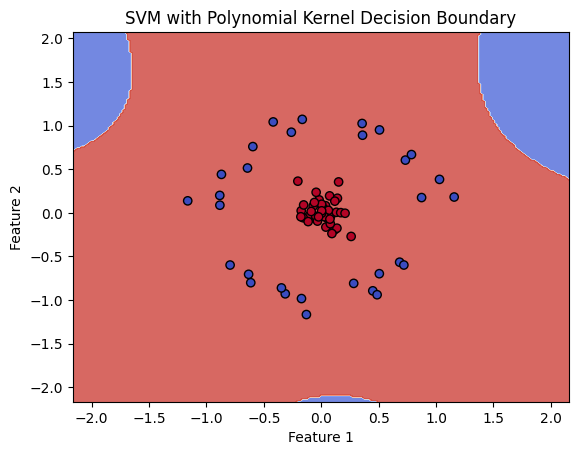

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset with two features for visualization
X, y = datasets.make_circles(n_samples=100, factor=.1, noise=.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a Polynomial kernel
# You can adjust the degree and other parameters
svm_poly = SVC(kernel='poly', degree=3, gamma='auto', C=1.0)

# Train the classifier
svm_poly.fit(X_train, y_train)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel Decision Boundary')
plt.show()

25. **Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naïve Bayes classifier object
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Gaussian Naïve Bayes Classifier on the Breast Cancer dataset: {accuracy:.2f}")

Accuracy of the Gaussian Naïve Bayes Classifier on the Breast Cancer dataset: 0.94


26. **Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset
# We'll select a subset of categories for simplicity
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target

# Convert text data into feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Multinomial Naïve Bayes classifier object
mnb_classifier = MultinomialNB()

# Train the classifier
mnb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = mnb_classifier.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Multinomial Naïve Bayes Classifier on the 20 Newsgroups dataset: {accuracy:.2f}")

# Print a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

Accuracy of the Multinomial Naïve Bayes Classifier on the 20 Newsgroups dataset: 0.83

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



27. **Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.**

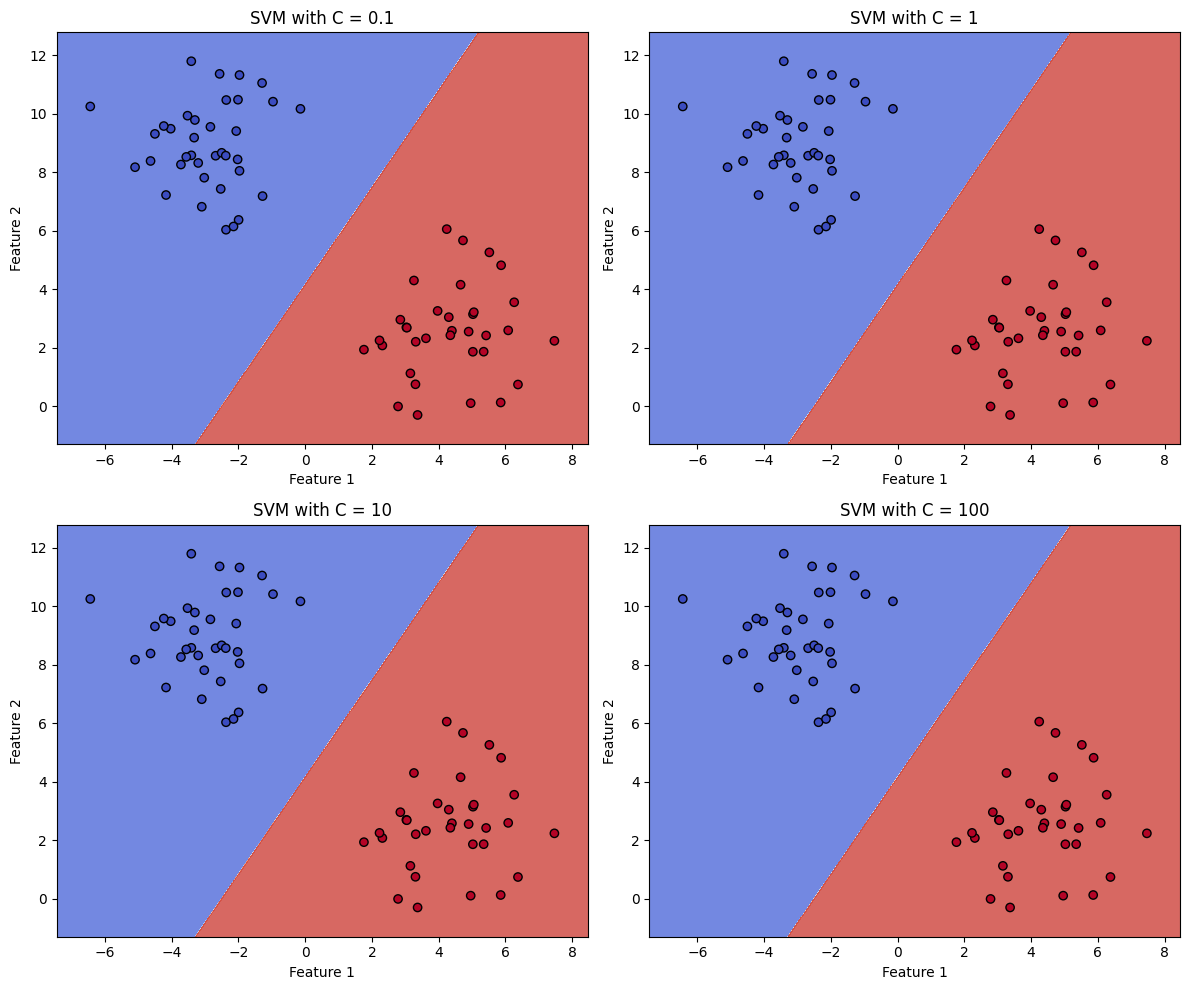

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset with two features for visualization
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Split the data into training and testing sets (optional for visualization, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different C values to experiment with
C_values = [0.1, 1, 10, 100]

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train and plot SVMs with different C values
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values):
    # Create an SVM classifier with RBF kernel (commonly used with C)
    # Using 'linear' kernel would also work and show the effect on the margin
    svm_classifier = SVC(kernel='linear', C=C) # Using linear kernel to clearly show margin effect

    # Train the classifier
    svm_classifier.fit(X_train, y_train)

    # Predict the class for each point in the mesh
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with C = {C}')

plt.tight_layout()
plt.show()

28. **Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Generate a synthetic binary dataset with binary features
# make_classification can generate binary features by setting n_informative, n_redundant, n_repeated, and n_features
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.5], flip_y=0.01, class_sep=1.0, hypercube=True, random_state=42)

# Convert features to binary (0 or 1) based on a threshold (e.g., 0)
# This step is important as make_classification can generate continuous features
X_binary = (X > 0).astype(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

# Create a Bernoulli Naïve Bayes classifier object
bnb_classifier = BernoulliNB()

# Train the classifier
bnb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = bnb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bernoulli Naïve Bayes Classifier: {accuracy:.2f}")

# Print a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Bernoulli Naïve Bayes Classifier: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.92      0.75      0.83        16

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30



29. **Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load a dataset where feature scaling is often beneficial for SVM
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM on unscaled data ---
svm_unscaled = SVC(kernel='rbf') # Using default RBF kernel
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy of SVM on unscaled data: {accuracy_unscaled:.2f}")

# --- Apply Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM on scaled data ---
svm_scaled = SVC(kernel='rbf') # Using RBF kernel
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of SVM on scaled data: {accuracy_scaled:.2f}")

# Compare accuracies
if accuracy_scaled > accuracy_unscaled:
    print("\nAccuracy improved after feature scaling.")
elif accuracy_unscaled > accuracy_scaled:
    print("\nAccuracy was better on unscaled data (less common for SVM).")
else:
    print("\nAccuracy is the same with and without feature scaling.")

Accuracy of SVM on unscaled data: 0.94
Accuracy of SVM on scaled data: 0.98

Accuracy improved after feature scaling.


30. **Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.**

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load a subset of the 20 Newsgroups dataset for text classification
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target

# Convert text data into feature vectors using CountVectorizer
# MultinomialNB works well with raw counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# --- Train a Naïve Bayes model without Laplace Smoothing (alpha=0) ---
# Note: While the question was about GaussianNB, this demonstrates Laplace smoothing with MultinomialNB.
# Setting alpha=0 can lead to zero probabilities for unseen features.
# We use try-except because alpha=0 might raise errors or warnings depending on the library version and data.
try:
    gnb_classifier_no_smoothing = MultinomialNB(alpha=0.0)
    gnb_classifier_no_smoothing.fit(X_train_counts, y_train)
    y_pred_no_smoothing = gnb_classifier_no_smoothing.predict(X_test_counts)
    accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
    print(f"Accuracy of Naïve Bayes without Laplace Smoothing (alpha=0): {accuracy_no_smoothing:.2f}")
    print("\nClassification Report (No Smoothing):")
    print(classification_report(y_test, y_pred_no_smoothing, target_names=newsgroups_test.target_names, zero_division=0)) # zero_division=0 to handle potential division by zero
except ValueError as e:
     print(f"Could not train MultinomialNB with alpha=0 due to error: {e}")
     print("This often happens when unseen features in the test set lead to zero probabilities without smoothing.")


# --- Train a Naïve Bayes model with Laplace Smoothing (alpha=1) ---
# This is the standard Laplace smoothing
gnb_classifier_smoothing = MultinomialNB(alpha=1.0)
gnb_classifier_smoothing.fit(X_train_counts, y_train)
y_pred_smoothing = gnb_classifier_smoothing.predict(X_test_counts)
accuracy_smoothing = accuracy_score(y_test, y_pred_smoothing)
print(f"\nAccuracy of Naïve Bayes with Laplace Smoothing (alpha=1): {accuracy_smoothing:.2f}")
print("\nClassification Report (With Smoothing):")
print(classification_report(y_test, y_pred_smoothing, target_names=newsgroups_test.target_names))

Accuracy of Naïve Bayes without Laplace Smoothing (alpha=0): 0.56

Classification Report (No Smoothing):
                        precision    recall  f1-score   support

           alt.atheism       0.50      0.98      0.67       319
soc.religion.christian       0.94      0.23      0.36       398

              accuracy                           0.56       717
             macro avg       0.72      0.60      0.52       717
          weighted avg       0.74      0.56      0.50       717


Accuracy of Naïve Bayes with Laplace Smoothing (alpha=1): 0.96

Classification Report (With Smoothing):
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.94      0.96       319
soc.religion.christian       0.95      0.98      0.97       398

              accuracy                           0.96       717
             macro avg       0.96      0.96      0.96       717
          weighted avg       0.96      0.96      0.96       717



/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


31. **Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).**

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset (Iris dataset as an example)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM classifier
svm = SVC()

# Use GridSearchCV to search for best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:\n", grid_search.best_estimator_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimator:
 SVC(C=0.1, gamma=0.1, kernel='poly')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


32. **Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.**

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0.01,
                           class_sep=0.8, hypercube=True, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {Counter(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify to maintain class distribution in splits

# --- Train SVM on imbalanced data without class weighting ---
print("\n--- Training SVM without Class Weighting ---")
svm_unweighted = SVC(kernel='linear', random_state=42) # Using linear kernel for simplicity
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)
print(f"Accuracy of SVM without class weighting: {accuracy_unweighted:.2f}")
print("\nClassification Report (No Class Weighting):")
print(classification_report(y_test, y_pred_unweighted))

# --- Train SVM on imbalanced data with class weighting ---
print("\n--- Training SVM with Class Weighting ---")
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
svm_weighted = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy of SVM with class weighting: {accuracy_weighted:.2f}")
print("\nClassification Report (With Class Weighting):")
print(classification_report(y_test, y_pred_weighted))

# Compare accuracies and classification reports
print("\n--- Comparison ---")
if accuracy_weighted > accuracy_unweighted:
    print("Accuracy improved with class weighting (overall accuracy might not change much, but recall/precision for minority class usually improves).")
elif accuracy_unweighted > accuracy_weighted:
     print("Accuracy was slightly better without class weighting (less common for imbalanced data, check classification reports).")
else:
    print("Accuracy is the same with and without class weighting.")

Dataset shape: (1000, 10)
Class distribution: Counter({np.int64(0): 940, np.int64(1): 60})

--- Training SVM without Class Weighting ---
Accuracy of SVM without class weighting: 0.98

Classification Report (No Class Weighting):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       282
           1       1.00      0.67      0.80        18

    accuracy                           0.98       300
   macro avg       0.99      0.83      0.89       300
weighted avg       0.98      0.98      0.98       300


--- Training SVM with Class Weighting ---
Accuracy of SVM with class weighting: 0.93

Classification Report (With Class Weighting):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       282
           1       0.44      0.78      0.56        18

    accuracy                           0.93       300
   macro avg       0.71      0.86      0.76       300
weighted avg       0.95      0.93      0

33. **Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.**

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load a subset of the 20 Newsgroups dataset that contains spam-related content
# We'll use 'comp.graphics' (less likely spam) and 'talk.politics.misc' (potentially more spam/controversial) as examples
# A more direct spam dataset would be ideal, but this demonstrates the process.
categories = ['comp.graphics', 'talk.politics.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target

# Convert text data into feature vectors using CountVectorizer
# This creates a bag-of-words representation
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Create a Multinomial Naïve Bayes classifier object
# Alpha=1.0 is for Laplace smoothing, which helps handle words not seen during training
mnb_classifier = MultinomialNB(alpha=1.0)

# Train the classifier
mnb_classifier.fit(X_train_counts, y_train)

# Predict on the test set
y_pred = mnb_classifier.predict(X_test_counts)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Multinomial Naïve Bayes Classifier for (simulated) spam detection: {accuracy:.2f}")

# Print a classification report for more detailed evaluation
# Note: The target names will correspond to the chosen categories
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

Accuracy of the Multinomial Naïve Bayes Classifier for (simulated) spam detection: 0.98

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.99      0.97      0.98       389
talk.politics.misc       0.96      0.99      0.98       310

          accuracy                           0.98       699
         macro avg       0.98      0.98      0.98       699
      weighted avg       0.98      0.98      0.98       699



34. **Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.**

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load a dataset (Iris dataset as an example)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train an SVM Classifier ---
svm_classifier = SVC(kernel='linear', random_state=42) # Using linear kernel for simplicity
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the SVM Classifier: {accuracy_svm:.2f}")

# --- Train a Gaussian Naïve Bayes Classifier ---
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_gnb = gnb_classifier.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy of the Gaussian Naïve Bayes Classifier: {accuracy_gnb:.2f}")

# --- Compare Accuracies ---
print("\n--- Comparison ---")
if accuracy_svm > accuracy_gnb:
    print("SVM Classifier has higher accuracy.")
elif accuracy_gnb > accuracy_svm:
    print("Gaussian Naïve Bayes Classifier has higher accuracy.")
else:
    print("Both classifiers have the same accuracy.")

Accuracy of the SVM Classifier: 1.00
Accuracy of the Gaussian Naïve Bayes Classifier: 0.98

--- Comparison ---
SVM Classifier has higher accuracy.


35. **Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.**

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train Naïve Bayes on original data ---
print("--- Training Naïve Bayes on Original Data ---")
gnb_original = GaussianNB()
gnb_original.fit(X_train, y_train)
y_pred_original = gnb_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of Naïve Bayes on original data: {accuracy_original:.2f}")

# --- Perform Feature Selection ---
# Using SelectKBest with chi2 (suitable for non-negative data)
# Select the top k features (e.g., 10)
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"\nOriginal number of features: {X_train.shape[1]}")
print(f"Number of features after selection: {X_train_selected.shape[1]}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_feature_indices}")
print(f"Selected feature names: {breast_cancer.feature_names[selected_feature_indices]}")


# --- Train Naïve Bayes on selected features ---
print("\n--- Training Naïve Bayes on Selected Features ---")
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy of Naïve Bayes on selected features: {accuracy_selected:.2f}")

# --- Compare Accuracies ---
print("\n--- Comparison ---")
if accuracy_selected > accuracy_original:
    print("Accuracy improved after feature selection.")
elif accuracy_original > accuracy_selected:
    print("Accuracy was better on original data.")
else:
    print("Accuracy is the same with and without feature selection.")

--- Training Naïve Bayes on Original Data ---
Accuracy of Naïve Bayes on original data: 0.94

Original number of features: 30
Number of features after selection: 10
Selected feature indices: [ 0  1  2  3 12 13 20 21 22 23]
Selected feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']

--- Training Naïve Bayes on Selected Features ---
Accuracy of Naïve Bayes on selected features: 0.95

--- Comparison ---
Accuracy improved after feature selection.


36. **Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.**

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset (which is a multiclass dataset)
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM with One-vs-Rest (OvR) strategy ---
# In scikit-learn, SVC uses OvR by default for multiclass problems if decision_function_shape is 'ovr'
svm_ovr = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy of SVM with One-vs-Rest (OvR) strategy: {accuracy_ovr:.2f}")

# --- Train SVM with One-vs-One (OvO) strategy ---
# In scikit-learn, you can specify 'ovo' for decision_function_shape
svm_ovo = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Accuracy of SVM with One-vs-One (OvO) strategy: {accuracy_ovo:.2f}")

# --- Compare Accuracies ---
print("\n--- Comparison ---")
if accuracy_ovr > accuracy_ovo:
    print("One-vs-Rest (OvR) strategy has higher accuracy.")
elif accuracy_ovo > accuracy_ovr:
    print("One-vs-One (OvO) strategy has higher accuracy.")
else:
    print("Both strategies have the same accuracy.")

Accuracy of SVM with One-vs-Rest (OvR) strategy: 0.98
Accuracy of SVM with One-vs-One (OvO) strategy: 0.98

--- Comparison ---
Both strategies have the same accuracy.


37. **Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store kernel types and their corresponding models
kernels = {
    "Linear": SVC(kernel='linear'),
    "Polynomial (degree=3)": SVC(kernel='poly', degree=3),
    "RBF": SVC(kernel='rbf')
}

# Train, predict, and evaluate each kernel
for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Kernel Accuracy: {accuracy:.4f}")

Linear Kernel Accuracy: 0.9561
Polynomial (degree=3) Kernel Accuracy: 0.8684
RBF Kernel Accuracy: 0.9825


38. **Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a dataset (Breast Cancer dataset as an example)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Define the number of folds for cross-validation
n_splits = 5

# Initialize Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create an SVM classifier object
    # You can experiment with different kernels and parameters
    svm_classifier = SVC(kernel='linear', random_state=42)

    # Train the classifier on the training data for this fold
    svm_classifier.fit(X_train, y_train)

    # Predict on the test data for this fold
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Fold {fold+1}: {accuracy:.2f}")
    accuracy_scores.append(accuracy)

# Compute the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage accuracy across {n_splits} folds: {average_accuracy:.2f}")

# You can also compute the standard deviation of the accuracy scores
std_accuracy = np.std(accuracy_scores)
print(f"Standard deviation of accuracy across {n_splits} folds: {std_accuracy:.2f}")

--- Fold 1/5 ---
Accuracy for Fold 1: 0.95
--- Fold 2/5 ---
Accuracy for Fold 2: 0.93
--- Fold 3/5 ---
Accuracy for Fold 3: 0.96
--- Fold 4/5 ---
Accuracy for Fold 4: 0.94
--- Fold 5/5 ---
Accuracy for Fold 5: 0.96

Average accuracy across 5 folds: 0.95
Standard deviation of accuracy across 5 folds: 0.01


39. **Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.**

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Generate a synthetic dataset with an imbalanced class distribution
# This will help demonstrate the effect of different prior probabilities
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0.01,
                           class_sep=1.0, hypercube=True, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {Counter(y)}")

# Split the data into training and testing sets
# We use stratify=y to maintain the class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set class distribution: {Counter(y_train)}")
print(f"Testing set class distribution: {Counter(y_test)}")

# --- Train Naïve Bayes with default (empirical) prior probabilities ---
print("\n--- Training Naïve Bayes with Default (Empirical) Priors ---")
# Default behavior is to learn class prior probabilities from the training data
gnb_default_priors = GaussianNB()
gnb_default_priors.fit(X_train, y_train)
y_pred_default_priors = gnb_default_priors.predict(X_test)
accuracy_default_priors = accuracy_score(y_test, y_pred_default_priors)
print(f"Accuracy with default priors: {accuracy_default_priors:.2f}")
print("\nClassification Report (Default Priors):")
print(classification_report(y_test, y_pred_default_priors))

# --- Train Naïve Bayes with custom prior probabilities ---
# Let's assume we know the true class distribution is different from the training data
# For example, if the true class distribution was closer to 50/50
custom_priors = np.array([0.5, 0.5]) # Example: Assuming a 50/50 class distribution

print("\n--- Training Naïve Bayes with Custom Priors (e.g., [0.5, 0.5]) ---")
# Pass the custom priors to the GaussianNB constructor
gnb_custom_priors = GaussianNB(priors=custom_priors)
gnb_custom_priors.fit(X_train, y_train)
y_pred_custom_priors = gnb_custom_priors.predict(X_test)
accuracy_custom_priors = accuracy_score(y_test, y_pred_custom_priors)
print(f"Accuracy with custom priors [0.5, 0.5]: {accuracy_custom_priors:.2f}")
print("\nClassification Report (Custom Priors [0.5, 0.5]):")
print(classification_report(y_test, y_pred_custom_priors))


# --- You can add more custom priors to compare ---
# Example: Assuming the true class distribution is even more skewed
more_skewed_priors = np.array([0.95, 0.05])

print("\n--- Training Naïve Bayes with More Skewed Custom Priors (e.g., [0.95, 0.05]) ---")
gnb_more_skewed_priors = GaussianNB(priors=more_skewed_priors)
gnb_more_skewed_priors.fit(X_train, y_train)
y_pred_more_skewed_priors = gnb_more_skewed_priors.predict(X_test)
accuracy_more_skewed_priors = accuracy_score(y_test, y_pred_more_skewed_priors)
print(f"Accuracy with custom priors [0.95, 0.05]: {accuracy_more_skewed_priors:.2f}")
print("\nClassification Report (Custom Priors [0.95, 0.05]):")
print(classification_report(y_test, y_pred_more_skewed_priors))


print("\n--- Comparison Summary ---")
print(f"Accuracy with Default (Empirical) Priors: {accuracy_default_priors:.2f}")
print(f"Accuracy with Custom Priors [0.5, 0.5]:   {accuracy_custom_priors:.2f}")
print(f"Accuracy with Custom Priors [0.95, 0.05]: {accuracy_more_skewed_priors:.2f}")

Dataset shape: (1000, 10)
Class distribution: Counter({np.int64(0): 890, np.int64(1): 110})

Training set class distribution: Counter({np.int64(0): 623, np.int64(1): 77})
Testing set class distribution: Counter({np.int64(0): 267, np.int64(1): 33})

--- Training Naïve Bayes with Default (Empirical) Priors ---
Accuracy with default priors: 0.95

Classification Report (Default Priors):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       267
           1       0.88      0.64      0.74        33

    accuracy                           0.95       300
   macro avg       0.92      0.81      0.85       300
weighted avg       0.95      0.95      0.95       300


--- Training Naïve Bayes with Custom Priors (e.g., [0.5, 0.5]) ---
Accuracy with custom priors [0.5, 0.5]: 0.92

Classification Report (Custom Priors [0.5, 0.5]):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       267
           1  

40. **Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.**

In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Load the Breast Cancer dataset (suitable for classification)
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train SVM on original data ---
print("--- Training SVM on Original Data ---")
svm_original = SVC(kernel='linear', random_state=42) # Using linear kernel for RFE ranking
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of SVM on original data: {accuracy_original:.2f}")

# --- Perform Recursive Feature Elimination (RFE) ---
# We need an estimator to perform RFE; SVM with a linear kernel is often used
estimator = SVC(kernel='linear')

# Initialize RFE
# n_features_to_select specifies the number of features to keep
# You can tune this number based on domain knowledge or cross-validation
n_features_to_select = 15 # Example: selecting half of the original features
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

# Fit RFE on the training data to select features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test) # Transform the test set based on the fitted RFE

print(f"\nOriginal number of features: {X_train.shape[1]}")
print(f"Number of features after RFE: {X_train_selected.shape[1]}")

# Get the mask of selected features (True for selected, False otherwise)
feature_mask = rfe.support_
print(f"Selected feature mask: {feature_mask}")

# Get the ranking of features (1 is the most important)
feature_ranking = rfe.ranking_
print(f"Feature ranking: {feature_ranking}")

# Get the names of the selected features
selected_feature_names = breast_cancer.feature_names[feature_mask]
print(f"Selected feature names: {selected_feature_names}")


# --- Train SVM on selected features ---
print("\n--- Training SVM on Selected Features (after RFE) ---")
# You can use any SVM kernel here; RBF is a common choice
svm_selected = SVC(kernel='rbf', random_state=42)
svm_selected.fit(X_train_selected, y_train)
y_pred_selected = svm_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy of SVM on selected features: {accuracy_selected:.2f}")

# --- Compare Accuracies ---
print("\n--- Comparison ---")
if accuracy_selected > accuracy_original:
    print("Accuracy improved after Recursive Feature Elimination.")
elif accuracy_original > accuracy_selected:
    print("Accuracy was better on original data.")
else:
    print("Accuracy is the same with and without RFE.")

--- Training SVM on Original Data ---
Accuracy of SVM on original data: 0.96

Original number of features: 30
Number of features after RFE: 15
Selected feature mask: [ True False False False  True  True  True  True  True False  True  True
  True False False False False False False False False  True False False
  True  True  True  True  True False]
Feature ranking: [ 1  2  4 14  1  1  1  1  1  9  1  1  1  5 11  8 16 10  7 12  6  1 13 15
  1  1  1  1  1  3]
Selected feature names: ['mean radius' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'perimeter error' 'worst texture' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']

--- Training SVM on Selected Features (after RFE) ---
Accuracy of SVM on selected features: 0.94

--- Comparison ---
Accuracy was better on original data.


41. **Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.**

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load a dataset (Breast Cancer dataset as an example)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier object
# You can experiment with different kernels and parameters
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier using Precision, Recall, and F1-Score
# For multiclass problems, you might need to specify an 'average' parameter (e.g., 'weighted', 'macro', 'micro')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# You can also print a classification report for a summary of metrics per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

Precision: 0.96
Recall: 0.98
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



42. **Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).**

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load a dataset (Breast Cancer dataset as an example)
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naïve Bayes classifier object
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Predict class probabilities on the test set
# log_loss requires probability estimates, not just class predictions
y_prob = gnb_classifier.predict_proba(X_test)

# Evaluate the classifier using Log Loss
# log_loss requires the true labels and the predicted probabilities
logloss = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy Loss) of the Naïve Bayes Classifier: {logloss:.4f}")

# Note: Lower Log Loss indicates better performance.

Log Loss (Cross-Entropy Loss) of the Naïve Bayes Classifier: 0.4899


43. **Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.**

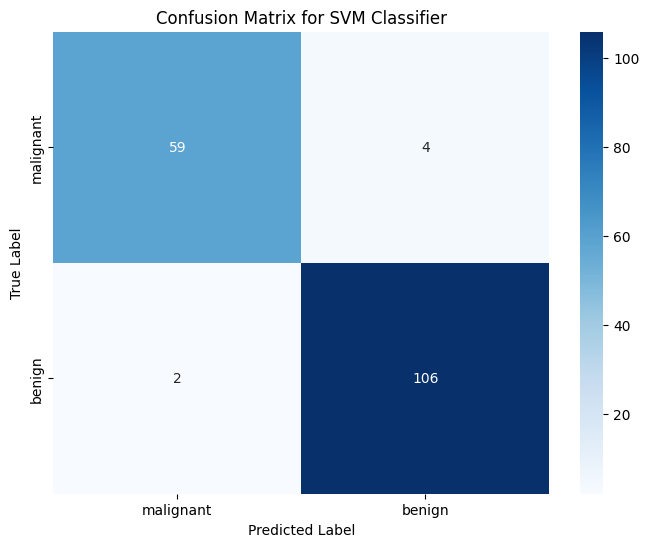

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load a dataset (Breast Cancer dataset as an example)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
class_names = breast_cancer.target_names # Get class names for better visualization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier object
# Using a linear kernel for simplicity, but you can use others
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

44. **Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.**

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load the California Housing dataset (a regression dataset)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVR object
# Using an RBF kernel as a common choice for regression
svr_regressor = SVR(kernel='rbf')

# Train the regressor
svr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test)

# Evaluate the regressor using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of the SVR on the California Housing dataset: {mae:.2f}")

# Note: Lower MAE indicates better performance.

Mean Absolute Error (MAE) of the SVR on the California Housing dataset: 0.87


45. **Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.**

In [8]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Load a binary classification dataset (Breast Cancer dataset as an example)
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naïve Bayes classifier object
gnb_classifier = GaussianNB()

# Train the classifier
gnb_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
# The roc_auc_score function requires probabilities
y_prob = gnb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC Score of the Naïve Bayes Classifier: {roc_auc:.4f}")

ROC-AUC Score of the Naïve Bayes Classifier: 0.9922


46. **Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.**

Average Precision (AP) Score: 0.9979


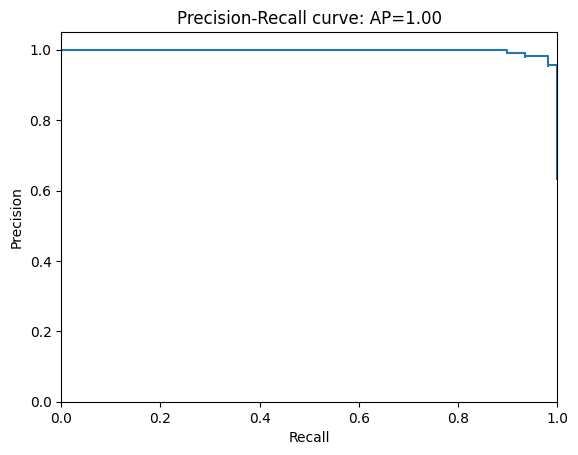

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load a binary classification dataset (Breast Cancer dataset as an example)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier object
# For precision-recall curve, you need either probability estimates or decision function values.
# SVC with probability=True enables probability estimates (can be slower).
# Alternatively, you can use the decision_function which gives a measure of confidence.
# Let's use decision_function here as it's often more reliable for SVMs.
svm_classifier = SVC(kernel='linear', random_state=42, decision_function_shape='ovo') # Use linear kernel for simplicity

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Get the decision function values for the test set
# For binary classification, decision_function returns a 1D array
y_score = svm_classifier.decision_function(X_test)

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Calculate the Average Precision (AP) score
# AP summarizes the curve into a single value
average_precision = average_precision_score(y_test, y_score)

print(f"Average Precision (AP) Score: {average_precision:.4f}")

# Plot the Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()